<a href="https://colab.research.google.com/github/Gouthammajjari/Intro_to_ml/blob/main/Assignment_3.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [2]:
import os
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
from sklearn.preprocessing import StandardScaler
from sklearn.model_selection import train_test_split
from sklearn.metrics import accuracy_score, confusion_matrix, precision_recall_curve, precision_score, recall_score, f1_score,average_precision_score, log_loss
import warnings
warnings.filterwarnings("ignore")
from sklearn.metrics import ConfusionMatrixDisplay


In [3]:
import pandas as pd


Problem 1
(i)


In [4]:
from sklearn.datasets import load_breast_cancer
breast = load_breast_cancer()
X = breast.data
print(X.shape)
y = breast.target


(569, 30)


In [5]:
data = pd.DataFrame(X)
data.head()

,0,1,2,3,4,5,6,7,8,9,...,20,21,22,23,24,25,26,27,28,29
0,17.99,10.38,122.80,1001.0,0.11840,0.27760,0.3001,0.14710,0.2419,0.07871,...,25.38,17.33,184.60,2019.0,0.1622,0.6656,0.7119,0.2654,0.4601,0.11890
1,20.57,17.77,132.90,1326.0,0.08474,0.07864,0.0869,0.07017,0.1812,0.05667,...,24.99,23.41,158.80,1956.0,0.1238,0.1866,0.2416,0.1860,0.2750,0.08902
2,19.69,21.25,130.00,1203.0,0.10960,0.15990,0.1974,0.12790,0.2069,0.05999,...,23.57,25.53,152.50,1709.0,0.1444,0.4245,0.4504,0.2430,0.3613,0.08758
3,11.42,20.38,77.58,386.1,0.14250,0.28390,0.2414,0.10520,0.2597,0.09744,...,14.91,26.50,98.87,567.7,0.2098,0.8663,0.6869,0.2575,0.6638,0.17300
4,20.29,14.34,135.10,1297.0,0.10030,0.13280,0.1980,0.10430,0.1809,0.05883,...,22.54,16.67,152.20,1575.0,0.1374,0.2050,0.4000,0.1625,0.2364,0.07678


In [6]:
# We specify this so that the train and test data set always have the same rows, respectively
np.random.seed(9)
X_train, X_test, y_train, y_test = train_test_split(X,
                                                   y,
                                                   train_size = 0.8,
                                                   test_size = 0.20,
                                                   random_state = 100)
X_train.shape, X_test.shape, y_train.shape, y_test.shape

((455, 30), (114, 30), (455,), (114,))

In [7]:

scale= StandardScaler()
X_train_scaled = scale.fit_transform(X_train) # standardization of dependent variables
X_train_scaled.shape


(455, 30)

In [8]:
from sklearn.linear_model import LogisticRegression

model = LogisticRegression()

model.fit(X_train_scaled, y_train)

LogisticRegression()

In [9]:
model.score(X_train_scaled, y_train)


0.9934065934065934

In [10]:

X_test_scaled = scale.transform(X_test)
y_pred = model.predict(X_test_scaled)

In [11]:
cnf_matrix = confusion_matrix(y_test, y_pred)


In [12]:
accuracy_score(y_test, y_pred),  recall_score(y_test, y_pred),precision_score(y_test, y_pred), f1_score(y_test, y_pred)


(0.9736842105263158, 1.0, 0.9558823529411765, 0.9774436090225563)

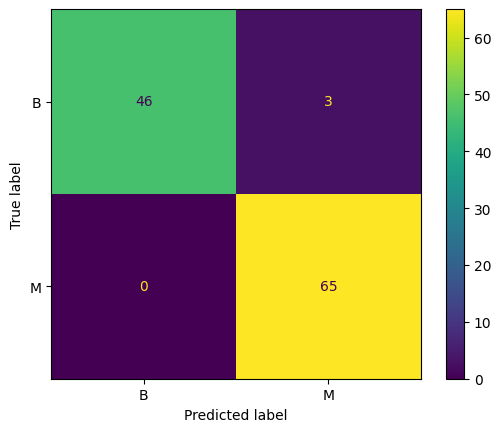

In [13]:

disp = ConfusionMatrixDisplay(confusion_matrix = cnf_matrix,
                             display_labels = ['B', 'M'])
disp.plot()

In [14]:
probs = model.predict_proba(X_test_scaled)
precision, recall,  thersholds = precision_recall_curve(y_test, probs[:,1])

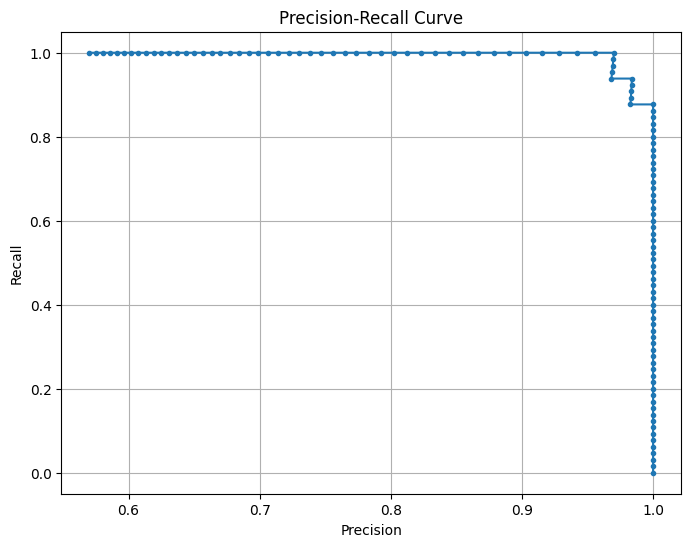

In [15]:
plt.figure(figsize=(8, 6))
plt.plot(precision, recall, marker='.')
plt.xlabel('Precision')
plt.ylabel('Recall')
plt.title('Precision-Recall Curve')
plt.grid(True)
plt.show()

In [16]:

y_pred_prob = model.predict_proba(X_test)
log_loss(y_test, y_pred_prob)

20.551205879759774

Problem 1
(ii)

Adding Regularizations

In [17]:
C = [10, 1, .1, .001]

for c in C:
    model = LogisticRegression(penalty='l1', C=c, solver='liblinear')
    model.fit(X_train_scaled, y_train)
    print('C:', c)
    y_pred = model.predict(X_test_scaled)
    print("Accuracy Score: ", accuracy_score(y_test, y_pred),
         "\nPrecision Score: ", precision_score(y_test, y_pred),
         "\nRecall Score: ", recall_score(y_test, y_pred),
          "\nF1 Score: ", f1_score(y_test, y_pred))
    print('Training accuracy:', model.score(X_train_scaled, y_train))
    print('Test accuracy:', model.score(X_test_scaled, y_test))
    print('')

C: 10
Accuracy Score:  0.9649122807017544 
Precision Score:  0.9552238805970149 
Recall Score:  0.9846153846153847 
F1 Score:  0.9696969696969696
Training accuracy: 0.9934065934065934
Test accuracy: 0.9649122807017544

C: 1
Accuracy Score:  0.9649122807017544 
Precision Score:  0.9420289855072463 
Recall Score:  1.0 
F1 Score:  0.9701492537313433
Training accuracy: 0.9912087912087912
Test accuracy: 0.9649122807017544

C: 0.1
Accuracy Score:  0.9649122807017544 
Precision Score:  0.9420289855072463 
Recall Score:  1.0 
F1 Score:  0.9701492537313433
Training accuracy: 0.978021978021978
Test accuracy: 0.9649122807017544

C: 0.001
Accuracy Score:  0.4298245614035088 
Precision Score:  0.0 
Recall Score:  0.0 
F1 Score:  0.0
Training accuracy: 0.35824175824175825
Test accuracy: 0.4298245614035088



In [18]:
C = [10, 1, .1, .001]
for c in C:
    model = LogisticRegression(penalty='l1', C=c, solver='liblinear')
    model.fit(X_train_scaled, y_train)
    print('C:', c)
    print('Coefficients:', model.coef_)
    print('Training accuracy:', model.score(X_train_scaled, y_train))
    print('Test accuracy:', model.score(X_test_scaled, y_test))
    print('')

C: 10
Coefficients: [[  0.91056559   0.           0.           0.           0.
    4.00122478  -3.53366706  -3.00019864   1.1575741    0.50545489
   -1.53282808   0.30486854   0.         -11.84572147  -0.44354238
    0.07614578   1.11298227  -3.51186453   0.87358581   5.60571959
    0.          -2.79868846  -5.13218227   0.          -1.64586167
    0.49214215  -0.63208731   0.          -2.29182686  -5.06986355]]
Training accuracy: 0.9934065934065934
Test accuracy: 0.9649122807017544

C: 1
Coefficients: [[ 0.         -0.07841804  0.          0.          0.          0.
  -0.62112671 -0.82269472  0.          0.23331244 -2.45071429  0.
   0.         -0.29608706 -0.25709274  0.83643764  0.          0.
   0.          0.21728553  0.         -1.39038148 -1.03878698 -2.82948818
  -0.66694019  0.         -0.48224247 -1.51638898 -0.61065915  0.        ]]
Training accuracy: 0.9912087912087912
Test accuracy: 0.9649122807017544

C: 0.1
Coefficients: [[ 0.          0.          0.          0.         

Here as C is decreasing, the Training accuracy is decreasing, so as the testing accuracy. It is because the model coefficients will be tending towards the zero as the C is decreasing



**Problem 2**

In [19]:
from sklearn.naive_bayes import GaussianNB


In [20]:
model_nb = GaussianNB()
model_nb.fit(X_train_scaled, y_train)
model_nb.score(X_train_scaled, y_train)

0.9362637362637363

In [21]:
y_pred = model_nb.predict(X_test_scaled)
print("Accuracy Score: ", accuracy_score(y_test, y_pred),
      "\nPrecision Score: ", precision_score(y_test, y_pred),
      "\nRecall Score: ", recall_score(y_test, y_pred),
      "\nF1 Score: ", f1_score(y_test, y_pred))

Accuracy Score:  0.9385964912280702 
Precision Score:  0.9264705882352942 
Recall Score:  0.9692307692307692 
F1 Score:  0.9473684210526316


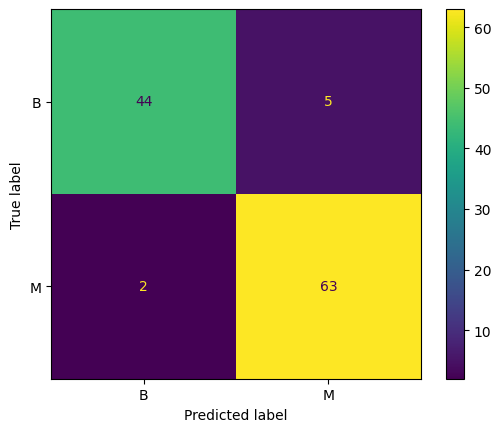

In [22]:
cnf_matrix = confusion_matrix(y_test, y_pred)
disp = ConfusionMatrixDisplay(confusion_matrix = cnf_matrix,
                             display_labels = ['B', 'M'])
disp.plot()

In [23]:

y_pred_prob = model_nb.predict_proba(X_test)
log_loss(y_test, y_pred_prob)

20.551205879759774

**Problem 3**

In [24]:
from sklearn.decomposition import PCA


In [25]:
scaler = StandardScaler()
X_scaled = scaler.fit_transform(X)

In [26]:

def pca_components(percentage):
    pca=PCA(percentage)
    xpca=pca.fit_transform(X_scaled)
    return pca.n_components_

In [27]:
for i in range(80,100,1):
    components=pca_components(i/100)
    print('for the explained variance ratio {},{} these are the number of components that hold the information'.format(i,components))


for the explained variance ratio 80,5 these are the number of components that hold the information
for the explained variance ratio 81,5 these are the number of components that hold the information
for the explained variance ratio 82,5 these are the number of components that hold the information
for the explained variance ratio 83,5 these are the number of components that hold the information
for the explained variance ratio 84,5 these are the number of components that hold the information
for the explained variance ratio 85,6 these are the number of components that hold the information
for the explained variance ratio 86,6 these are the number of components that hold the information
for the explained variance ratio 87,6 these are the number of components that hold the information
for the explained variance ratio 88,6 these are the number of components that hold the information
for the explained variance ratio 89,7 these are the number of components that hold the information
for the ex

In [28]:
pca = PCA()
mxpca=pca.fit_transform(X_scaled)

<function matplotlib.pyplot.ylabel(ylabel, fontdict=None, labelpad=None, *, loc=None, **kwargs)>

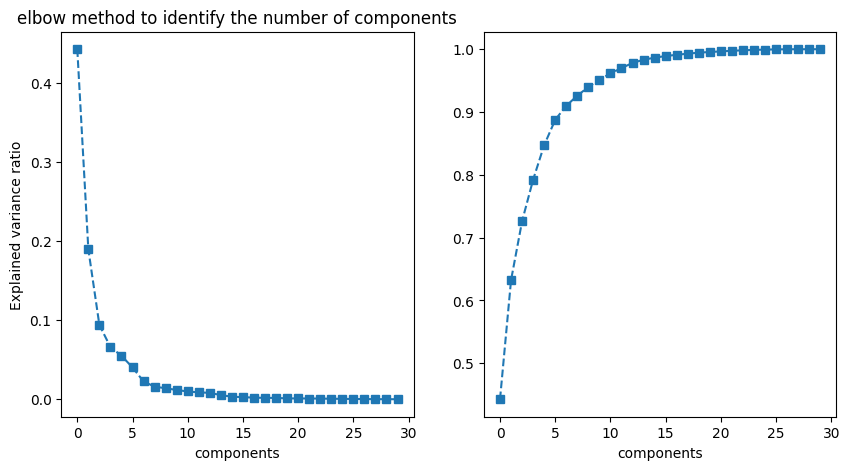

In [29]:
evr=pca.explained_variance_ratio_
plt.figure(figsize=(10,5))

plt.subplot(1,2,1)
plt.plot(evr,'s--')
plt.xlabel('components')
plt.ylabel('Explained variance ratio')
plt.title('elbow method to identify the number of components')

cuv=np.cumsum(evr)
plt.subplot(1,2,2)
plt.plot(cuv,'s--')
plt.xlabel('components')
plt.ylabel


From the above elbow method, Optimal number for k is 6.



In [30]:
pca_opt = PCA(n_components=6)

In [31]:
principalComponents = pca_opt.fit_transform(X_scaled)
principalDf = pd.DataFrame(data = principalComponents,columns = ['pc{}'.format(i) for i in range(1,7)])
principalDf.head()

,pc1,pc2,pc3,pc4,pc5,pc6
0,9.192837,1.948583,-1.123167,3.633732,-1.195106,1.411436
1,2.387802,-3.768172,-0.529292,1.118262,0.621771,0.028646
2,5.733896,-1.075174,-0.551748,0.912083,-0.177085,0.541456
3,7.122953,10.275589,-3.232790,0.152547,-2.960879,3.053421
4,3.935302,-1.948072,1.389767,2.940639,0.546747,-1.226496


In [32]:
principalDf['target'] = y


In [33]:
principalDf.shape

(569, 7)

In [34]:
principalDf.head()

,pc1,pc2,pc3,pc4,pc5,pc6,target
0,9.192837,1.948583,-1.123167,3.633732,-1.195106,1.411436,0
1,2.387802,-3.768172,-0.529292,1.118262,0.621771,0.028646,0
2,5.733896,-1.075174,-0.551748,0.912083,-0.177085,0.541456,0
3,7.122953,10.275589,-3.232790,0.152547,-2.960879,3.053421,0
4,3.935302,-1.948072,1.389767,2.940639,0.546747,-1.226496,0


In [35]:
X_principal = principalDf.drop(columns=['target'])
y_principal = principalDf['target']


In [36]:
np.random.seed(9)
X_train, X_test, y_train, y_test = train_test_split(X_principal,
                                                   y_principal,
                                                   train_size = 0.8,
                                                   test_size = 0.20,
                                                   random_state = 100)
X_train.shape, X_test.shape, y_train.shape, y_test.shape

((455, 6), (114, 6), (455,), (114,))

In [37]:

principal_model_log = LogisticRegression()
principal_model_log.fit(X_train, y_train)
principal_model_log.score(X_train, y_train)
y_pred = principal_model_log.predict(X_test)
print("Accuracy Score: ", accuracy_score(y_test, y_pred),
      "\nPrecision Score: ", precision_score(y_test, y_pred),
      "\nRecall Score: ", recall_score(y_test, y_pred),
      "\nF1 Score: ", f1_score(y_test, y_pred))

Accuracy Score:  0.956140350877193 
Precision Score:  0.9545454545454546 
Recall Score:  0.9692307692307692 
F1 Score:  0.9618320610687022


**Problem 4**

In [38]:
principal_model_nb = GaussianNB()
principal_model_nb.fit(X_train, y_train)
principal_model_nb.score(X_train, y_train)
y_pred = principal_model_nb.predict(X_test)
print("Accuracy Score: ", accuracy_score(y_test, y_pred),
      "\nPrecision Score: ", precision_score(y_test, y_pred),
      "\nRecall Score: ", recall_score(y_test, y_pred),
      "\nF1 Score: ", f1_score(y_test, y_pred))

Accuracy Score:  0.9210526315789473 
Precision Score:  0.9117647058823529 
Recall Score:  0.9538461538461539 
F1 Score:  0.9323308270676691


Iterating over K values Just to check the Accuracy and other scores

In [39]:
for i in range(6, 30, 2):
  pca_opt = PCA(n_components=i)
  principalComponents = pca_opt.fit_transform(X_scaled)
  principalDf = pd.DataFrame(data = principalComponents,columns = ['pc{}'.format(j) for j in range(1,i+1)])
  principalDf['target'] = y
  X_principal = principalDf.drop(columns=['target'])
  y_principal = principalDf['target']
  np.random.seed(9)
  X_train, X_test, y_train, y_test = train_test_split(X_principal,
                                                    y_principal,
                                                    train_size = 0.8,
                                                    test_size = 0.20,
                                                    random_state = 100)
  principal_model_log = LogisticRegression()
  principal_model_log.fit(X_train, y_train)
  principal_model_log.score(X_train, y_train)
  y_pred = principal_model_log.predict(X_test)
  print("\nK: ", i)
  print("max ratio: ", np.cumsum(pca_opt.explained_variance_ratio_)[-1])
  print("Accuracy Score: ", accuracy_score(y_test, y_pred),
        "\nPrecision Score: ", precision_score(y_test, y_pred),
        "\nRecall Score: ", recall_score(y_test, y_pred),
        "\nF1 Score: ", f1_score(y_test, y_pred))


K:  6
max ratio:  0.8875879635667783
Accuracy Score:  0.956140350877193 
Precision Score:  0.9545454545454546 
Recall Score:  0.9692307692307692 
F1 Score:  0.9618320610687022

K:  8
max ratio:  0.925982538691924
Accuracy Score:  0.9649122807017544 
Precision Score:  0.9552238805970149 
Recall Score:  0.9846153846153847 
F1 Score:  0.9696969696969696

K:  10
max ratio:  0.9515688143333634
Accuracy Score:  0.9649122807017544 
Precision Score:  0.9420289855072463 
Recall Score:  1.0 
F1 Score:  0.9701492537313433

K:  12
max ratio:  0.9700713832175911
Accuracy Score:  0.9649122807017544 
Precision Score:  0.9420289855072463 
Recall Score:  1.0 
F1 Score:  0.9701492537313433

K:  14
max ratio:  0.9833502905460394
Accuracy Score:  0.9736842105263158 
Precision Score:  0.9558823529411765 
Recall Score:  1.0 
F1 Score:  0.9774436090225563

K:  16
max ratio:  0.9891502160789623
Accuracy Score:  0.9736842105263158 
Precision Score:  0.9558823529411765 
Recall Score:  1.0 
F1 Score:  0.9774436

Optimal K number from the above results will be K = 6, which covers 88.76% of the data. Because For Cancer prediction, Recall Score should be maximum percentage Along with precision.(Because we need to detect as many cancer cases as possible). Also the trade-off score(F1 score) is also pretty good, compared to other k components.

From the elbow method also, optimal number for K is resulted in 6

In [40]:
for i in range(6, 30, 2):
  pca_opt = PCA(n_components=i)
  principalComponents = pca_opt.fit_transform(X_scaled)
  principalDf = pd.DataFrame(data = principalComponents,columns = ['pc{}'.format(j) for j in range(1,i+1)])
  principalDf['target'] = y
  X_principal = principalDf.drop(columns=['target'])
  y_principal = principalDf['target']
  np.random.seed(9)
  X_train, X_test, y_train, y_test = train_test_split(X_principal,
                                                    y_principal,
                                                    train_size = 0.8,
                                                    test_size = 0.20,
                                                    random_state = 100)
  principal_model_log = GaussianNB()
  principal_model_log.fit(X_train, y_train)
  principal_model_log.score(X_train, y_train)
  y_pred = principal_model_log.predict(X_test)
  print("\nK: ", i)
  print("max ratio: ", np.cumsum(pca_opt.explained_variance_ratio_)[-1])
  print("Accuracy Score: ", accuracy_score(y_test, y_pred),
        "\nPrecision Score: ", precision_score(y_test, y_pred),
        "\nRecall Score: ", recall_score(y_test, y_pred),
        "\nF1 Score: ", f1_score(y_test, y_pred))


K:  6
max ratio:  0.8875879635667783
Accuracy Score:  0.9210526315789473 
Precision Score:  0.9117647058823529 
Recall Score:  0.9538461538461539 
F1 Score:  0.9323308270676691

K:  8
max ratio:  0.925982538691924
Accuracy Score:  0.9122807017543859 
Precision Score:  0.8873239436619719 
Recall Score:  0.9692307692307692 
F1 Score:  0.9264705882352942

K:  10
max ratio:  0.9515688143333634
Accuracy Score:  0.9122807017543859 
Precision Score:  0.8873239436619719 
Recall Score:  0.9692307692307692 
F1 Score:  0.9264705882352942

K:  12
max ratio:  0.9700713832175911
Accuracy Score:  0.9035087719298246 
Precision Score:  0.875 
Recall Score:  0.9692307692307692 
F1 Score:  0.9197080291970802

K:  14
max ratio:  0.9833502905460394
Accuracy Score:  0.9035087719298246 
Precision Score:  0.875 
Recall Score:  0.9692307692307692 
F1 Score:  0.9197080291970802

K:  16
max ratio:  0.9891502160789623
Accuracy Score:  0.9035087719298246 
Precision Score:  0.875 
Recall Score:  0.9692307692307692

Optimal K number from the above results will be K = 6, which covers 88.76% of the data. Because For Cancer prediction, Recall Score should be maximum percentage Along with precision.(Because we need to detect as many cancer cases as possible). Also the trade-off score(F1 score) is also pretty good, compared to other k components.

From the elbow method also, optimal number for K is resulted in 6